# Peccoux Lucie - 261087292 - Assignment 2

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install causalml 

In [1]:
import causalml
causalml.__version__

'0.13.0'

# Context of the Study

For this assigment a chose a dataset regarding basketball results. It's composed by 21 columns. Each row reprensents a shot made by a player, the different features are characteristic of this shot. Here is a quick data dictionnary of the features which don't speak for themselves: 
- MATCHUP : the 2 teams that played the game, the first team mentioned in the value is the player's team whose shot is being studied
- Location : H if the player was playing Home, A if not
- W : Result of the game, if the player studied was in the winning team the value is W, if not it's L
- Shot Number : At what point of the game the shot was shoot. 1 for example means it was the first shot of the game, 6 the sixth shot of the game etc..
- Period : The time period the shot was shoot during
- Dribbles : The number of dribbles before the shot
- Touch Time : The amount of time the player had the ball in his hand before shooting
- Shot Distance = How far the player was when he shot
- Pts type : wheter it was a 3 points shot or a 2 points shot
- Shot Results : Made if the ball goes in, Missed otherwise
- Closest defendant player : How close/far was the first defender from the oppposite team


# Importing all the libraries needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# DATA CLEANING

In [3]:
shot=pd.read_csv("shot_logs.csv")

#Preview of the data
shot

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [4]:
#Data Shape
shot.shape

(128069, 21)

In [5]:
#Data Type
shot.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [6]:
#Fixing the variables types
shot = shot.convert_dtypes()
shot.dtypes

GAME_ID                         Int64
MATCHUP                        string
LOCATION                       string
W                              string
FINAL_MARGIN                    Int64
SHOT_NUMBER                     Int64
PERIOD                          Int64
GAME_CLOCK                     string
SHOT_CLOCK                    Float64
DRIBBLES                        Int64
TOUCH_TIME                    Float64
SHOT_DIST                     Float64
PTS_TYPE                        Int64
SHOT_RESULT                    string
CLOSEST_DEFENDER               string
CLOSEST_DEFENDER_PLAYER_ID      Int64
CLOSE_DEF_DIST                Float64
FGM                             Int64
PTS                             Int64
player_name                    string
player_id                       Int64
dtype: object

In [7]:
#Checking for null variables
shot.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

Out of 128 069 observations, only 5 567 have missing values for the SHOT_CLOCK value. This is less than 5% of the observation. I choose to delete the rows with the NA values. 

In [8]:
#Deleting NA values
shot=shot.dropna()
shot

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,4,2,5:05,15.3,2,...,8.9,2,made,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127


Over the 21 features, I do a preselection. I want to study the Shot_Result variable as my target. I want to this indepently of the player or the defendant. 

In [9]:
#Dropping the irrelevant column to our study
shot=shot.drop(columns=['FINAL_MARGIN','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','FGM','player_name','player_id'])
shot

,GAME_ID,MATCHUP,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,PTS
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3,2
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1,0
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,6,2,8:15,9.1,2,4.4,18.4,2,missed,2.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,4,2,5:05,15.3,2,1.6,8.9,2,made,5.7,2
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,5,3,1:52,18.3,5,6.2,8.7,2,missed,0.8,0
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,6,4,11:28,19.8,4,5.2,0.6,2,made,0.6,2
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,7,4,11:10,23.0,2,4.2,16.9,2,made,4.2,2


In [10]:
#Changing the binary variables : 
mapping={'H':1, 'A':0}
shot['LOCATION']=shot['LOCATION'].map(mapping)

mapping1={'W':1,'L':0}
shot['W']=shot['W'].map(mapping1)

mapping2={'made':1,'missed':0}
shot['SHOT_RESULT']=shot['SHOT_RESULT'].map(mapping2)

shot

,GAME_ID,MATCHUP,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,PTS
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,2
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,0
5,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,2
128064,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,0
128065,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,2
128066,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,2


In [11]:
#Get an idea of the data
shot.describe()

,GAME_ID,LOCATION,W,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,PTS
count,1.225020e+05,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,2.140045e+07,0.499478,0.507330,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,0.456156,4.121706,1.005469
std,2.578228e+02,0.500002,0.499948,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,0.498076,2.751587,1.131129
min,2.140000e+07,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,0.000000,0.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000,0.000000
50%,2.140045e+07,0.000000,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,0.000000,3.700000,0.000000
75%,2.140067e+07,1.000000,1.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,1.000000,5.300000,2.000000
max,2.140091e+07,1.000000,1.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,1.000000,53.200000,3.000000


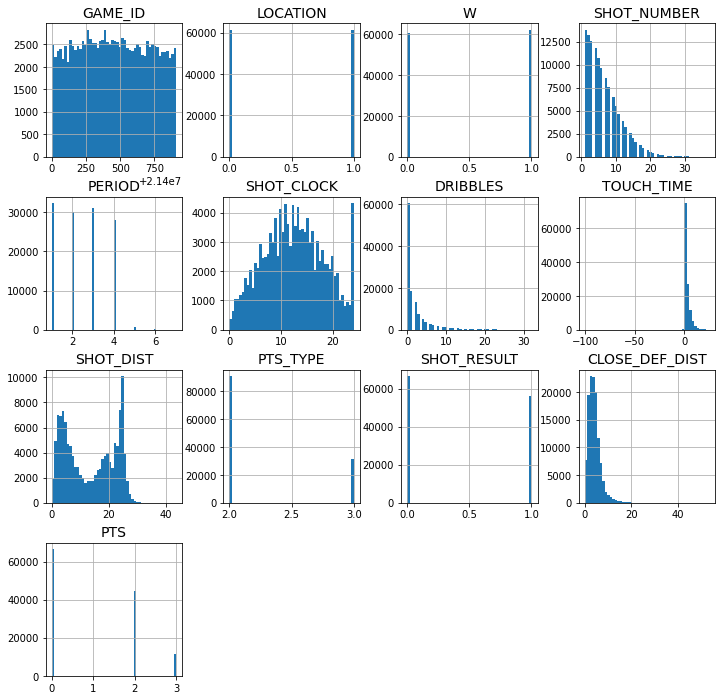

In [12]:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

shot.hist(bins=50, figsize=(12, 12))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [13]:
#Looking for correlation
attributes=shot[['SHOT_RESULT','LOCATION','W','SHOT_NUMBER','PERIOD',
                  'DRIBBLES', 'TOUCH_TIME','SHOT_DIST','CLOSE_DEF_DIST','PERIOD']]
corr_matrix = attributes.corr()
print(corr_matrix)

                SHOT_RESULT  LOCATION         W  SHOT_NUMBER    PERIOD  \
SHOT_RESULT        1.000000  0.008726  0.048235    -0.006589 -0.015078   
LOCATION           0.008726  1.000000  0.123112    -0.003052  0.002915   
W                  0.048235  0.123112  1.000000     0.004032 -0.001182   
SHOT_NUMBER       -0.006589 -0.003052  0.004032     1.000000  0.654080   
PERIOD            -0.015078  0.002915 -0.001182     0.654080  1.000000   
DRIBBLES          -0.033922 -0.014326  0.011742     0.144983  0.062193   
TOUCH_TIME        -0.047230 -0.012082  0.012643     0.150743  0.052911   
SHOT_DIST         -0.183711 -0.000946  0.008640     0.005547  0.029559   
CLOSE_DEF_DIST     0.001174  0.003746  0.028395    -0.037538 -0.009665   
PERIOD            -0.015078  0.002915 -0.001182     0.654080  1.000000   

                DRIBBLES  TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST    PERIOD  
SHOT_RESULT    -0.033922   -0.047230  -0.183711        0.001174 -0.015078  
LOCATION       -0.014326   -0.012

The data was already pretty clean so not a lot of preprocessing was needed. 
Now that we have a better understanding of the data, we can focus on the causal analysis. 

# CAUSAL ANALYSIS

For the following steps my target variable will be the SHOT_RESULT meaning if the shot was made or missed. 
I'll use the distance of the shot as a treatment variable. To get a better treatment variable I will bin the shot distance into multiple categories. 

In [15]:
plt.style.use('fivethirtyeight')

I'm doing a first try here by creating a new column treatment for the shot distance THe idea is to split the shot distance into 5 categories. The first one is for observations where the distance to the net is between 0 and 10 feet, the 2nd one for one it is between 10 and 20 feet and so on until 50 feet. The maximum distance is 43.5 feet as seen in the data exploration. 

In [16]:
#Let's remove irrelevant column for the causal analysis
causalshot=shot.drop(['GAME_ID','MATCHUP','PTS'],axis=1)

bins=[0,10,20,30,40,50]
labels=[1,2,3,4,5]
causalshot['Treatment Shot Distance']=pd.cut(causalshot['SHOT_DIST'], bins=bins, labels=labels, include_lowest=True)

causalshot

,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,Treatment Shot Distance
0,0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1
1,0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,3
3,0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,2
4,0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,1
5,0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,1
128064,0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,1
128065,0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,1
128066,0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,2


In [17]:
#Let's calculate the propensity for each observation 
n_made_shots = len(causalshot[causalshot["SHOT_RESULT"]==1])

propensity_scores = []
for label in labels:
    n_treated_shots = len(causalshot[(causalshot["SHOT_RESULT"]==1) & (causalshot["Treatment Shot Distance"]==label)])
    e_made_shots = n_treated_shots / n_made_shots
    propensity_scores.append(e_made_shots)

causalshot["propensity"] = causalshot.apply(lambda x: propensity_scores[x["Treatment Shot Distance"]-1] if x["SHOT_RESULT"]==1 
                           else 1 - propensity_scores[x["Treatment Shot Distance"]-1], axis=1)

causalshot

,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,Treatment Shot Distance,propensity
0,0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1,0.531317
1,0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,3,0.740497
3,0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,2,0.791267
4,0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,1,0.468683
5,0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,2,0.791267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,1,0.531317
128064,0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,1,0.468683
128065,0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,1,0.531317
128066,0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,2,0.208733


In [19]:
from causalml.inference.meta import BaseSRegressor
#from causalml.inference.meta import LRSRegressor

import numpy as np

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Now I am going to run a LRSRegressor. To do so I will create a new column Treatment_A. The value will be 1 if the value of "Treatment Shot Distance" is one, meaning it's the closest to the net and "control" for all the other case (2,3,4,5).
In the following try, I'll be using a BaseSregressor and a linear regression. 

In [20]:
causalshot['Treatment_A'] = np.where((causalshot['Treatment Shot Distance'] == 1), 1, 'control')
causalshot

,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,Treatment Shot Distance,propensity,Treatment_A
0,0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1,0.531317,1
1,0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,3,0.740497,control
3,0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,2,0.791267,control
4,0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,1,0.468683,1
5,0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,2,0.791267,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,1,0.531317,1
128064,0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,1,0.468683,1
128065,0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,1,0.531317,1
128066,0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,2,0.208733,control


In [21]:
from sklearn.linear_model import LinearRegression

w_multi=causalshot['Treatment_A']
y=causalshot['SHOT_RESULT']
X=causalshot[['LOCATION','W','SHOT_NUMBER','PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','PTS_TYPE',
            'CLOSE_DEF_DIST']]


base_algo = LinearRegression()
slearner = BaseSRegressor(base_algo, control_name='control')
#slearner.fit(X, w_multi, y)
slearner.estimate_ate(X, w_multi, y)

array([0.16463499])

In [22]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [23]:
feature_names=['LOCATION','W','SHOT_NUMBER','PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','PTS_TYPE',
            'CLOSE_DEF_DIST']
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'1': SHOT_NUMBER       0.659903
 SHOT_CLOCK        0.340097
 LOCATION          0.000000
 W                 0.000000
 PERIOD            0.000000
 DRIBBLES          0.000000
 TOUCH_TIME        0.000000
 PTS_TYPE          0.000000
 CLOSE_DEF_DIST    0.000000
 dtype: float64}

With this methodology of a BaseSregressor and a linear regression it seems like the shot_number is important and influences the outcome of wether the shot will be missed or made. The Shot_clock feature is also important. 
What is interresting to me is that some features I would have guessed to be important at first are not here, like the distance from the closest defender or wether the team was winning or not. 

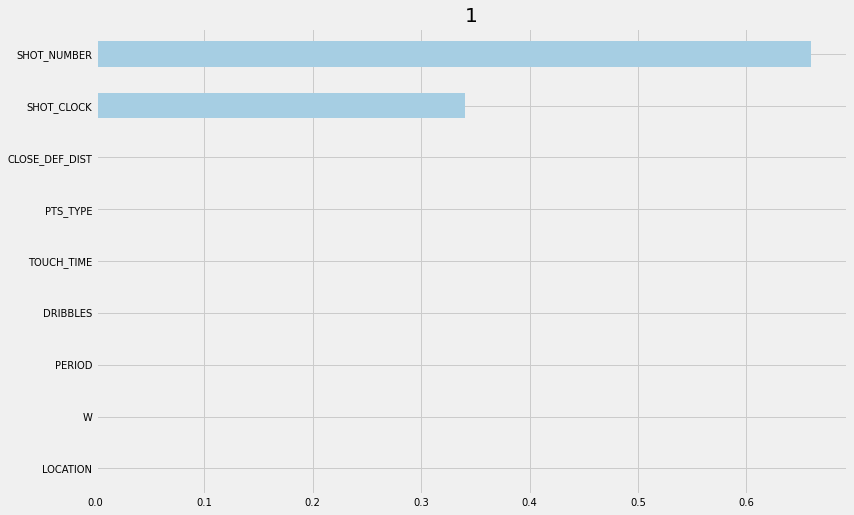

In [24]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

# Trying it another way - Change of Treatment

As only to feature seems to be important in the treatment chosen, I wanted to push things a bit further and try a different treatment. 
In this case I still use the SHOT_RESULT as the target and the Shot Distance as the treatment but I'll change the conditions. 
Refering to the data exploration we can see that the mean for the shot distance is aroun 13 to 14 feet. I decided to modify the treatment so that the Treatment Shot Distance column will take the value 1 if the shot was made within 15 feet around the net and 0 if it was further. 

In [25]:
causalshot2=shot.drop(['GAME_ID','MATCHUP','PTS'],axis=1)

causalshot2['Treatment Shot Distance']=np.where((causalshot2['SHOT_DIST'] <= 15), 1, 0)
causalshot2


,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,Treatment Shot Distance
0,0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1
1,0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,0
3,0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,0
4,0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,1
5,0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,1
128064,0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,1
128065,0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,1
128066,0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,0


In [32]:
y=causalshot2['SHOT_RESULT']
X=causalshot2[['LOCATION','W','SHOT_NUMBER','PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','PTS_TYPE',
            'CLOSE_DEF_DIST']]

In [33]:
causalshot2['Treatment_A'] = np.where((causalshot2['Treatment Shot Distance'] == 1), 1, 'control')
w_multi2=causalshot2['Treatment_A']
causalshot2

,LOCATION,W,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,Treatment Shot Distance,Treatment_A
0,0,1,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1,1
1,0,1,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,0,control
3,0,1,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,0,control
4,0,1,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,1,1
5,0,1,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,0,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,0,0,4,2,5:05,15.3,2,1.6,8.9,2,1,5.7,1,1
128064,0,0,5,3,1:52,18.3,5,6.2,8.7,2,0,0.8,1,1
128065,0,0,6,4,11:28,19.8,4,5.2,0.6,2,1,0.6,1,1
128066,0,0,7,4,11:10,23.0,2,4.2,16.9,2,1,4.2,0,control


In [34]:
base_algo = LinearRegression()
slearner = BaseSRegressor(base_algo, control_name='control')
#slearner.fit(X, w_multi, y)
slearner.estimate_ate(X, w_multi2, y)

array([0.15163537])

In [35]:
slearner_tau2 = slearner.fit_predict(X, w_multi2, y)

In [36]:
feature_names=['LOCATION','W','SHOT_NUMBER','PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','PTS_TYPE',
            'CLOSE_DEF_DIST']
slearner.get_importance(X=X, 
                        tau=slearner_tau2,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'1': SHOT_NUMBER       0.659794
 PERIOD            0.329897
 SHOT_CLOCK        0.010309
 LOCATION          0.000000
 W                 0.000000
 DRIBBLES          0.000000
 TOUCH_TIME        0.000000
 PTS_TYPE          0.000000
 CLOSE_DEF_DIST    0.000000
 dtype: float64}

The result with this new method are quite different. We can see here that the SHOT_NUMBER feature is still the most important. Maybe it is because players are getting tired over time and miss more shot towards the end of the game and miss more shots. That would alos make sens as the Period is the 2nd most important feature in this case. It is then followed by the SHOT_CLOCK.

Here again we can see that the distance to the closest defender is not important and we can also notice that wether the game is played at home or away is not important either. 

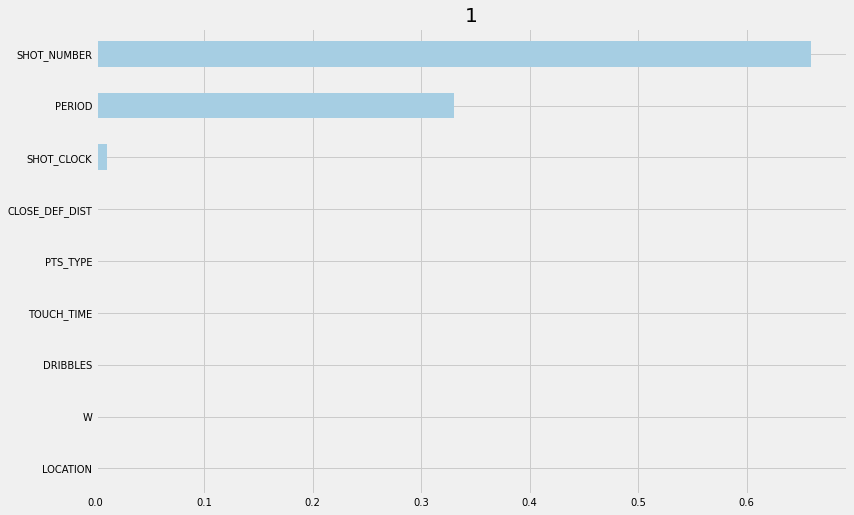

In [37]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau2, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

# Feature importance (method=permutation)

In [38]:
slearner.get_importance(X=X, 
                        tau=slearner_tau2, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'1': LOCATION          0.0
 W                 0.0
 SHOT_NUMBER       0.0
 PERIOD            0.0
 SHOT_CLOCK        0.0
 DRIBBLES          0.0
 TOUCH_TIME        0.0
 PTS_TYPE          0.0
 CLOSE_DEF_DIST    0.0
 dtype: float64}

The permutation method do not designate any features as relevant

In [39]:
import time
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau2, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 1.5031683444976807 seconds


In [41]:
#To remove,not necessary
#slearner.plot_importance(X=X, 
#                         tau=slearner_tau2, 
#                         method='permutation', 
#                         features=feature_names, 
#                         random_state=42)

In [43]:
#Notneeded

*
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
model_tau=LGBMRegressor(importance_type='gain')

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau2, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

NameError: name 'LRSRegressor' is not defined

# Shapley values

Shapley values and graphs are used to determine how each variable contributeto the model's predictive capability. Here they are used with the second treatment. 

In [44]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau2)
shap_slearner

{'1': array([[0.00000000e+00, 0.00000000e+00, 7.45388994e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.45388994e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.45388994e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 7.04731412e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.04731412e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.45388994e-19, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])}

In [45]:
np.mean(np.abs(shap_slearner['1']),axis=0)

array([0.00000000e+00, 0.00000000e+00, 7.26198707e-19, 2.28515995e-19,
       1.42709653e-20, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

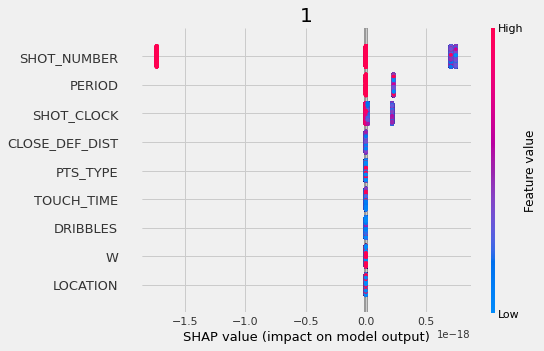

In [46]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau2, features=feature_names)

The y-axis represents the order of importance.
As mentionned previsouly we see that the shot_number is the most important feature followed but the period and the shot clock. What we can understand from the Sharp Value is that a high number of shots does not necessarly mean that you are going to succeed your next shot. 
We can also understand that the earliest in the game the shot is, there is mire chance it will be made same as the shot_clock that is better when it is low. 

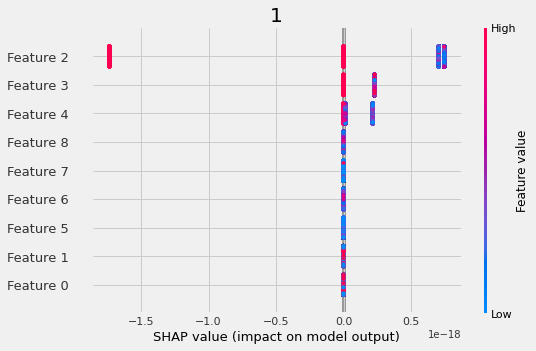

In [47]:
#Shap values with a speciifc shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

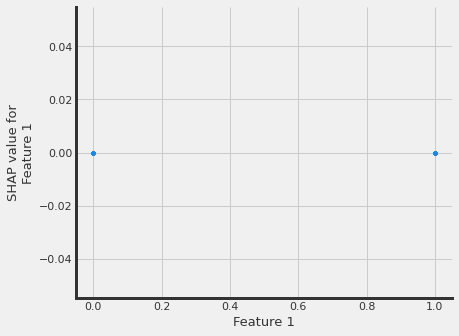

In [48]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='1',
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau2,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

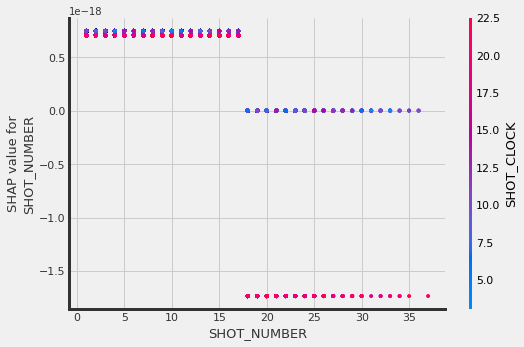

In [55]:
slearner.plot_shap_dependence(treatment_group='1',
                              feature_idx='SHOT_NUMBER',
                              X=X,
                              tau=slearner_tau2,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

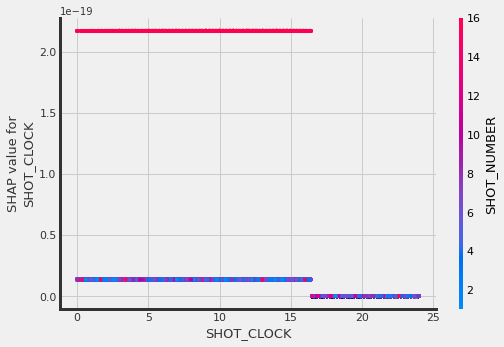

In [54]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='1',
                              feature_idx='SHOT_CLOCK',
                              X=X,
                              tau=slearner_tau2,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

# T learner with a Base T Regressor and a Linear Regression

Here we will try other methods with the T learner methods

In [69]:
from causalml.inference.meta import XGBTRegressor
from causalml.inference.meta import BaseTRegressor
from xgboost import XGBRegressor

In [70]:
tlearner = BaseTRegressor(LinearRegression(), control_name='control')
tlearner.estimate_ate(X, w_multi2, y)

(array([0.10708961]), array([0.10160702]), array([0.1125722]))

In [71]:
tlearner2=XGBTRegressor(control_name='control')
tlearner2.estimate_ate(X,w_multi2,y)

(array([0.19736313]), array([0.19214234]), array([0.20258392]))

Depending on the method used, the results are not the same. For the first try, I am using a BaseT regressor class and a Linear Regression. For the second try, I'm using the ready-to-use XGBTRegressor

Feature importance with BaseT regressor class and a Linear Regression

In [76]:
tlearner_tau=tlearner.fit_predict(X, w_multi2, y)
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'1': PTS_TYPE          0.525145
 CLOSE_DEF_DIST    0.241010
 TOUCH_TIME        0.165135
 SHOT_CLOCK        0.048710
 PERIOD            0.014566
 W                 0.003263
 SHOT_NUMBER       0.001703
 DRIBBLES          0.000361
 LOCATION          0.000106
 dtype: float64}

 The results here with this method are a lot different from the one we've seen earlier. Gere the most important feature is the points types, so wether the player was aiming for a 2 points shot or 3 points shot. It is followed by the distance to the closest defender, the Touch time and the Shot Clock.
Here the shot number comes seventh in the importance order to predict the shot result. 

We can also notice that here again wether the game was played at home or away do not have an important impact on the outcome.


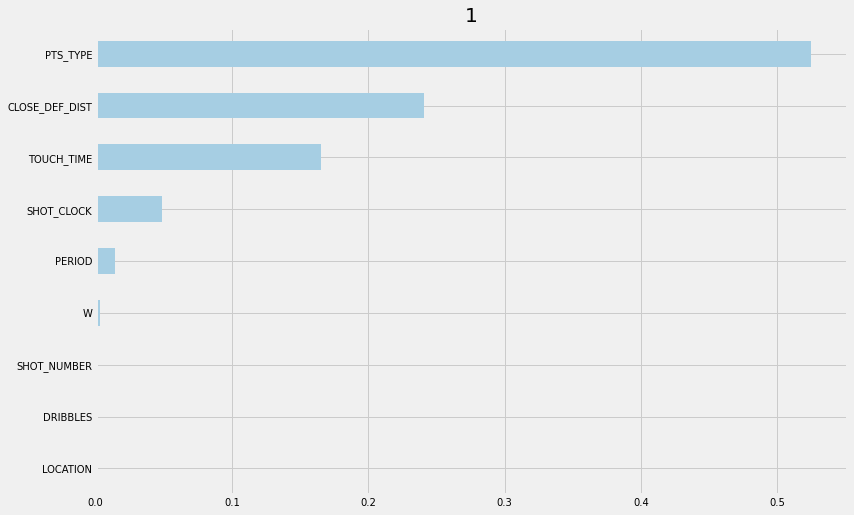

In [78]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [81]:
#Permutation Method
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)


{'1': PTS_TYPE          1.980760
 CLOSE_DEF_DIST    0.530711
 TOUCH_TIME        0.295397
 SHOT_CLOCK        0.091240
 PERIOD            0.022799
 W                 0.006416
 DRIBBLES          0.002993
 SHOT_NUMBER       0.002754
 LOCATION          0.000159
 dtype: float64}

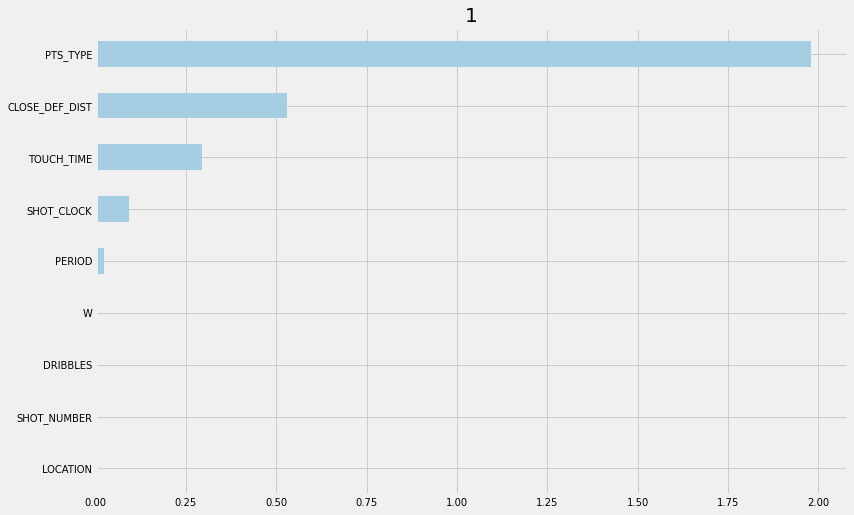

In [82]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

The important features are the same with the permutation method.

In [85]:
#Shapley Values
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{'1': array([[ 7.08290237e-04, -5.66792879e-03, -4.08940655e-03, ...,
          1.46793686e-02,  5.22862527e-02, -4.88397945e-02],
        [ 6.79547436e-04, -5.57271579e-03, -3.48438286e-03, ...,
          2.13688631e-02, -1.52692064e-01,  1.99275922e-02],
        [ 8.23843261e-04, -6.08494140e-03, -1.85472928e-03, ...,
          1.48903397e-02,  5.27026914e-02, -1.12425604e-02],
        ...,
        [ 5.91550786e-04,  5.75311884e-03, -3.02738239e-04, ...,
         -3.61114609e-02,  4.93323710e-02, -5.94649023e-02],
        [ 6.92235175e-04,  5.20603211e-03, -3.68370040e-05, ...,
         -2.07513921e-02,  5.23823824e-02,  1.10197406e-02],
        [ 6.50478026e-04,  5.93504003e-03,  8.61649555e-04, ...,
         -2.39939809e-02,  5.21501263e-02, -1.30276649e-02]])}

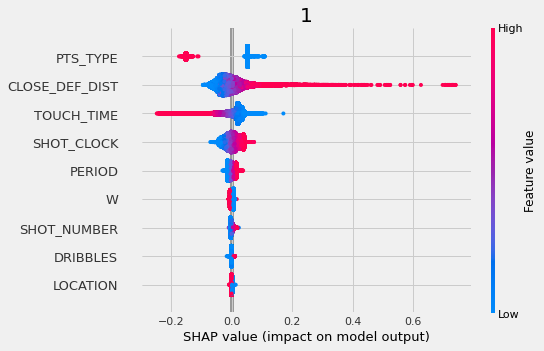

In [86]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

We can see here that if the point type of the shot intended is high (3 points) it will be harder to get it through whereas it appears to be easier for a 2 points shot. It also appears to the closest the player is to a defender the harder it will be to make the shot. 


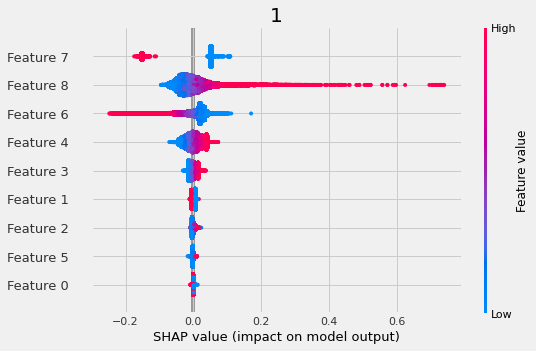

In [87]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

# T learner with ready to use XGBT Regressor

Feature importance for the ready-to-use XGBTRegressor

In [77]:
tlearner_tau2=tlearner2.fit_predict(X, w_multi2, y)
tlearner2.get_importance(X=X, 
                        tau=tlearner_tau2, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'1': TOUCH_TIME        0.369259
 CLOSE_DEF_DIST    0.208865
 SHOT_CLOCK        0.160591
 W                 0.098714
 PTS_TYPE          0.077753
 SHOT_NUMBER       0.037458
 DRIBBLES          0.025447
 PERIOD            0.015675
 LOCATION          0.006239
 dtype: float64}

In this case, it's the touchtime which is the most important factor. It is followed here again by the distance to the closest defender and by the shot_clock. Wether the team wins or not comes right after and we then have the points types and the shot number. 

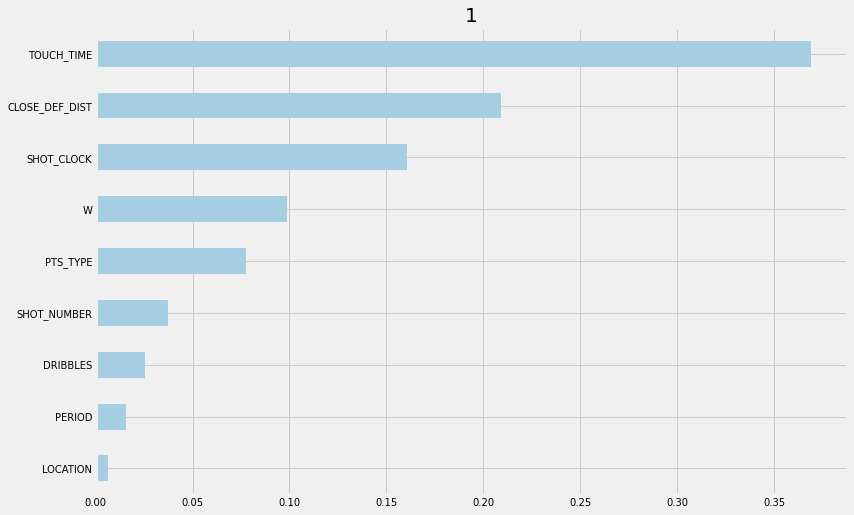

In [79]:
tlearner2.plot_importance(X=X, 
                         tau=tlearner_tau2, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [83]:
#Permutation Method
tlearner2.get_importance(X=X, 
                        tau=tlearner_tau2, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)


{'1': TOUCH_TIME        0.526077
 CLOSE_DEF_DIST    0.406867
 SHOT_CLOCK        0.241503
 W                 0.156586
 PTS_TYPE          0.150435
 DRIBBLES          0.059152
 SHOT_NUMBER       0.047114
 PERIOD            0.032142
 LOCATION          0.007896
 dtype: float64}

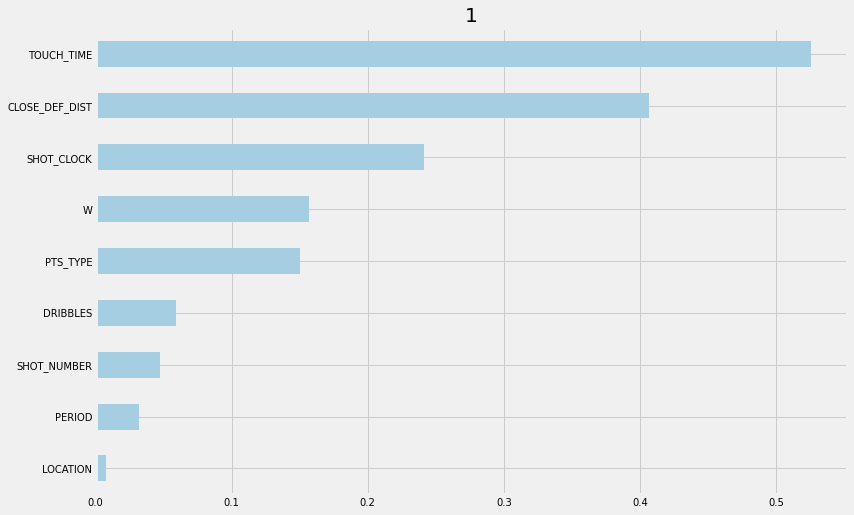

In [84]:
tlearner2.plot_importance(X=X, 
                         tau=tlearner_tau2, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

The important feature are the same with the permutation. The coefficient changed.

In [88]:
#Shapley Values
shap_tlearner2 = tlearner2.get_shap_values(X=X, tau=tlearner_tau2)
shap_tlearner2

{'1': array([[ 1.53783168e-03, -5.33379561e-03, -6.56769319e-03, ...,
         -2.57875222e-02, -3.79086155e-03, -3.68013497e-02],
        [ 3.39961616e-03, -6.48524913e-02,  1.63592233e-02, ...,
          6.79027568e-02,  2.51499106e-02,  3.58398579e-02],
        [ 1.53904132e-03, -1.02753087e-02,  7.79299342e-05, ...,
         -5.69958632e-02,  2.46779439e-03, -1.09084655e-02],
        ...,
        [-1.25181791e-03,  6.54418414e-03,  1.85580116e-03, ...,
         -6.00719761e-02, -1.04966344e-02, -4.95260598e-02],
        [ 8.08224029e-04,  1.67737323e-02, -1.97713825e-02, ...,
         -8.84797061e-02, -2.63751800e-02,  4.21689853e-02],
        [ 1.12904234e-03,  1.13302442e-02, -7.12812505e-03, ...,
         -1.07370386e-01, -7.26859848e-03, -7.49036839e-03]])}

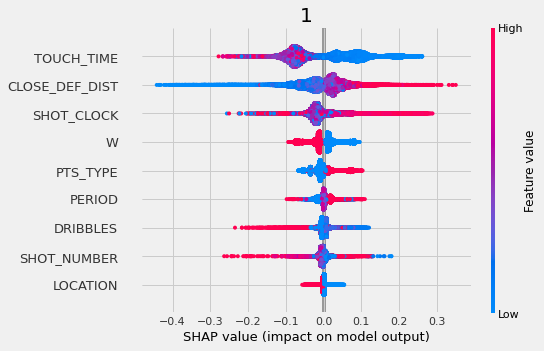

In [89]:
# Plot shap values without specifying shap_dict
tlearner2.plot_shap_values(X=X, tau=tlearner_tau2, features=feature_names)

What we can see here is that the touch time is important, a low touch time tends to influence in a good way the outcome of the shot. Same as before if a defender is close to the player aiming for the shot it will be harder to make it compared to whent he defender is further away. 


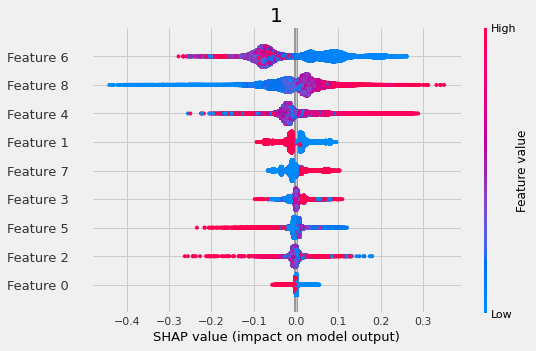

In [90]:
# Plot shap values WITH specifying shap_dict
tlearner2.plot_shap_values(X=X, shap_dict=shap_tlearner2)